# Exercise of buying a pizza
* You go for pizza with your friend.
* Menu is clear, smaller pizza costs 100, bigger one which has diameter larger by 10cm, costs 200.

## Questions
* At which diameter d, it pays off to buy 2 smaller pizzas rather than 1 bigger one.
* Does it ever pay-off to buy 1 bigger rather than 3 smaller ones

### Bonus:
* How does all the above change if you do not care about a 1cm dry edge of the pizza?

---
---
# In case this is your first Jupyter Notebook:
* Every cell is executed with Shift-Enter, once your cursor is in it.
* After successul run, a serial number of the execution will appear on the left from the cell
* For cell execution and creation of a new cell below, use Alt-Enter.
* Any text after a # symbol is a comment (to annotate your code) and it is ignored by Python
* CAUTION: If you execute a cell which has a hint in the output, the hint will disappear, therefore it is better to use Alt-Enter.
---
---

In [3]:
# import of classical modules as in the introduction
import numpy as np
import matplotlib.pyplot as plt

# advanced feature (save to ignore), which enables to set parameters 
# for ALL the plots in the notebook at once
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,6] # graph size
mpl.rcParams['lines.linewidth'] = 3  # line width
mpl.rcParams['lines.markersize'] = 10  # size of point markers
mpl.rcParams['xtick.labelsize'] = 12  # font size of x axis ticks
mpl.rcParams['ytick.labelsize'] = 12 # font size of y axis ticks
mpl.rcParams['axes.labelsize'] = 'larger'  # font size of the axes labels

# uncomment the command below to find out all possible parameters of graph you can change/set.
# mpl.rcParams.keys() 

In [4]:
# Our unknown is the pizza diameter (d)
# define an array of reasonable d values
d = np.linspace(0, 50, 101)
print(d)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5 50. ]


## Condition we are solving for is when area of 2 smaller pizzas is larger than area of 1 bigger pizza. 

$2S_{small}{\gt}S_{big}$

* Hopefully the pizzas are circular

$ 2{\cdot}\pi\left(\dfrac{d}{2}\right)^2 \gt \pi\left(\dfrac{d+10}{2}\right)^2$

After arrangin everything on one side, we solve when the expression is > 0
* Note that $\pi$ in Python is written as np.pi

In [5]:
# Calculate functional values for range of d you picked
f1 = 2*np.pi*(d/2)**2 - np.pi*((d+10)/2)**2

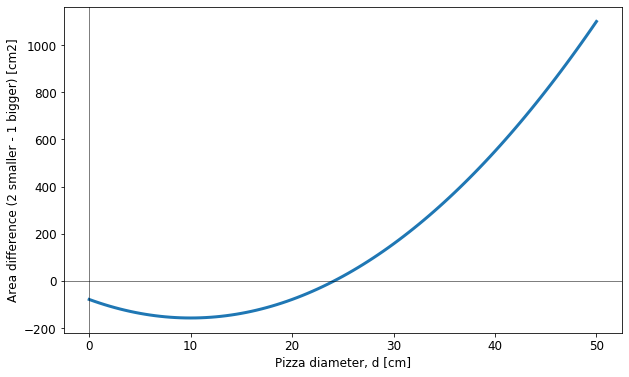

In [6]:
# Plot the function, together with x axis as below
plt.plot(d, f1)
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Pizza diameter, d [cm]')
plt.ylabel('Area difference (2 smaller - 1 bigger) [cm2]')
plt.show()

### From ~23cm of diameter, it always pays off to buy 2 smaller pizzas.
---

## Let's calculate the intercept exactly. We have at least two options:
1. In the quadratic function intro, we have a method in case we know parameters a,b,c, therefore we would need to rearrange our expression on paper first.
2. That is not practical for more complicated expressions, therefore Python has a function SOLVE
* FSOLVE will solve our expression numerically, using certain algorithm in a loop approaching progressively the correct solution.

In [7]:
# For using fsolve, we need to import it from scipy.optimize module
from scipy.optimize import fsolve

In [8]:
## Into fsolve, we need to pass a function of some variable/variables
## We can do that in the following way:
# we define (def) function which calculates area difference (what we plot on y axis) based on input d
def area_diff(d):  # area_diff is only dependent on d
    diff = 2*np.pi*(d/2)**2 - np.pi*((d+10)/2)**2  # same expression as above for a difference
    return diff  # return statement, function return a value of diff.

In [10]:
# test the function for d=10
area_diff(10)

-157.07963267948966

This means that for diameter of 10cm, area of 2 smaller pizzas is smaller by $157\,cm^2$ than 1 larger.

---

## Try different inputs of d on your own
 * By trial you can find out, when the difference will become positive.
 * And that is the moment when you want to buy 2 smaller pizzas instead of two smaller ones.

In [12]:
# Let's use FSOLVE by inputing our area_diff to find exact solution.
fsolve(area_diff)

TypeError: fsolve() missing 1 required positional argument: 'x0'

In [15]:
## What does this error mean?
# FSOLVE needs one required argument x0: which is our first estimate of a solution.
# writing fsolve and pressing Shift-Tab, all arguments of the FSOLVE function should show up
fsolve(area_diff, x0=11)

array([24.14213562])

# FSOLVE is mighty instrument
* Works on any type of equation, not only quadratic
* Solves system of equations too

## Unfortunately we cannot blindly trust every results FSOLVE returns (try yourselve):
* if your initial guess (x0) is close to the first intercept, FSOLVE will return the second root of the quadratic equation, which is illogical (negative pizza diameter) for our purposes.
* If x0 is close to the APEX of the parabola (x0=10), FSOLVE will be confused whether to go right or left and ultimately is going to fail.
* If you are reasonably close with your x0, you are safe.
---

## Now let's try to find out, when 1 bigger pizza pays off compared to 3 smaller ones.
* Careful, this question is formulated opposite than the previous one.

In [1]:
## define f2, similarly as f1 before
f2 = np.pi*((d+10)/2)**2 - 3*np.pi*(d/2)**2

NameError: name 'np' is not defined

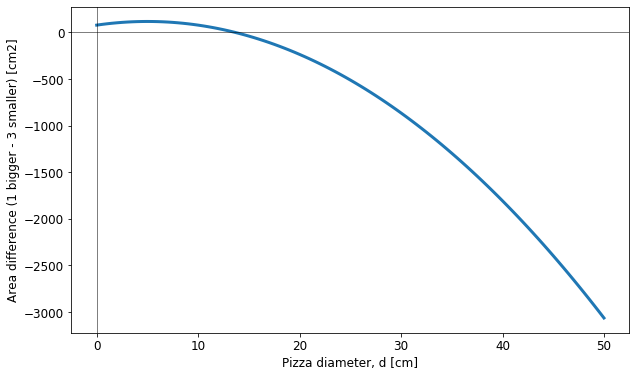

In [17]:
# Plot the area difference with the axes as below
plt.plot(d, f2)
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Pizza diameter, d [cm]')
plt.ylabel('Area difference (1 bigger - 3 smaller) [cm2]')
plt.show()

In [18]:
# Define function area_diff2 (what we plot on y axis), which has only 1 free parameter, d.
# We need a new function, because now we calculate 3 vs 1.
def area_diff2(d):
    diff = np.pi*((d+10)/2)**2 - 3*np.pi*(d/2)**2  # same expression as above
    return diff  # returns area difference

In [19]:
# Try FSOLVE for x0=11
fsolve(area_diff2, 11)

array([13.66025404])

Up to diameter of 13.7 cm, it is better to buy 1 bigger than 3 smaller pizzas.

---
## If you are hungry by now, good job and good apetite. If not, try to extend your solution by considering the dry edge of a pizza...

* What if you do not care about the dry edge of the pizza, so that you want to discard it from your calculations?
* How is it going to affect your decisions about 2 vs 1 and 3 vs 1 pizzas?

In [20]:
# The easiest way is to adapt our already written functions for area difference.
# We do it by adding one free parameter which value stands from thickness of the edge
def area_diff(d, edge=0): # edge=0, if we do not provide edge parameter to the function, Python will use predefined value of 0 set by a smart programmer.
    diff = 2*np.pi*((d-2*edge)/2)**2 - np.pi*((d+10-2*edge)/2)**2
    return diff

# for 3 vs 1
def area_diff2(d, edge=0):
    diff = np.pi*((d+10-2*edge)/2)**2 - 3*np.pi*((d-2*edge)/2)**2
    return diff

In [21]:
# Repeat FSOLVE
fsolve(area_diff, x0=15, args=1) # through args, we pass additional argumets going into area_diff, in this case edge.

array([26.14213562])

In [22]:
fsolve(area_diff2, x0=15, args=1)

array([15.66025404])

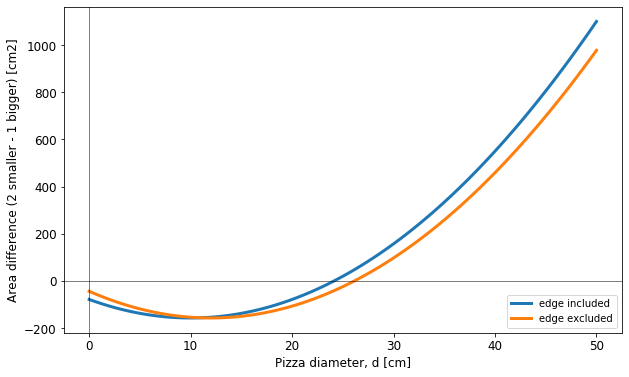

In [23]:
# Repeat graph plotting
plt.plot(d, f1, label='edge in')
plt.plot(d, area_diff(d, edge=1), label='edge out')
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Pizza diameter, d [cm]')
plt.ylabel('Area difference (2 smaller - 1 bigger) [cm2]')
plt.legend()
plt.show()

## Food for thought:
### Is it correct that the curves for d < 10 is increasing? How do you explain that? 
----

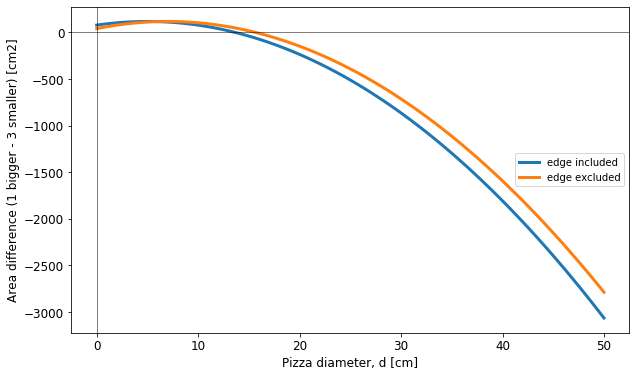

In [24]:
# plot the graph for 3 vs 1
plt.plot(d, f2, label='edge in')
plt.plot(d, area_diff2(d, edge=1), label='edge out')
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Pizza diameter, d [cm]')
plt.ylabel('Area difference (1 bigger - 3 smaller) [cm2]')
plt.legend()
plt.show()

# Congrats for finishing and see you soon again!!!